# Github Users Collaboration Network

<img src="images/graphs22.png" alt="" style="width: 400px;"/>


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import networkx as nx
import nxviz as nv

path = 'data/dc23/'

In [11]:
G = nx.read_gpickle(path+'github_users.p')

## Characterizing the network (I)

To start out, let's do some basic characterization of the network, by looking at the number of nodes and number of edges in a network. It has been pre-loaded as G. Your job in this exercise is to identify how many nodes and edges are present in the network. You can use the functions `len(G.nodes())` and `len(G.edges())` to calculate the number of nodes and edges respectively.

In [12]:
# Number of nodes
len(G.nodes())

56519

In [13]:
# Number of edges
len(G.edges())

72900

In [14]:
list(G.nodes())[100]

'u101'

In [15]:
list(G.edges(data=True))[100]

('u3', 'u4328', {})

## Characterizing the network (II)

Let's continue recalling what you've learned before about node importances, by plotting the **degree distribution of a network**. This is the distribution of node degrees computed across all nodes in a network.

- Plot the **degree distribution** of the GitHub collaboration network G. Recall that there are four steps involved here:
    - Calculating the degree centrality of G.
    - Using the `.values()` method of G and converting it into a list.
    - Passing the list of degree distributions to `plt.hist()`.
    - Displaying the histogram with `plt.show()`.

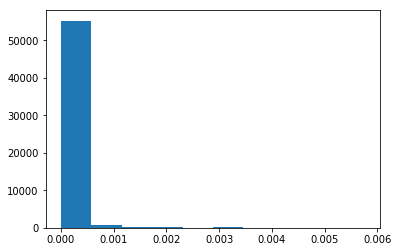

In [16]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show();

## Characterizing the network (III)

The last exercise was on degree centrality; this time round, let's recall **betweenness centrality**!

A small note: if executed correctly, this exercise may need about 5 seconds to execute.

- Plot the **betweenness centrality distribution** of the GitHub collaboration network. You have to follow exactly the same four steps as in the previous exercise, substituting `nx.betweenness_centrality()` in place of `nx.degree_centrality()`.

In [50]:
selected_nodes = [n for n, v in G.nodes(data=True) if n <= 'u11'] 
print(len(selected_nodes))
G100 = G.subgraph(selected_nodes).copy()

1113


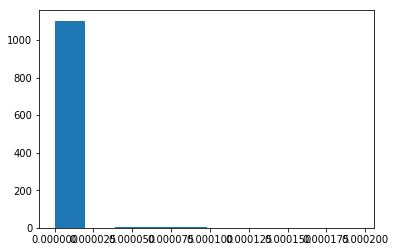

In [51]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G100).values()))
plt.show();

## Connected Component Subgraphs

<img src="images/graphs23.png" alt="" style="width: 400px;"/>


## MatrixPlot

Let's now practice making some visualizations. The first one will be the **MatrixPlot**. In a **MatrixPlot**, the matrix is the representation of the edges.

- Make a **MatrixPlot** visualization of the largest **connected component subgraph**, with authors grouped by their user group number.
    - First, calculate the largest connected component subgraph by using the `nx.connected_component_subgraphs(G)` inside the provided `sorted()` function. Python's built-in `sorted()` function takes an iterable and returns a sorted list (in ascending order, by default). Therefore, to access the largest connected component subgraph, the statement is sliced with `[-1]`.
    - Create the **MatrixPlot** object h. You have to specify the parameters graph and node_grouping to be the largest connected component subgraph and 'grouping', respectively.
    - Draw the **MatrixPlot** object to the screen and display the plot.
    
Recall that in a **MatrixPlot**, nodes are the rows and columns of the matrix, and cells are filled in according to whether an edge exists between the pairs of nodes.

In [52]:
# there is an issue with node_grouping: https://github.com/ericmjl/nxviz/issues/536
#h = nv.MatrixPlot(graph=largest_ccs, node_grouping='grouping')

# Iterate over all the nodes in G, including the metadata and add 'grouping'
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['grouping']
    G.node[n]['grouping'] = nx.degree(G, n)
    
# Iterate over all the nodes in G, including the metadata and add 'grouping'
for n, d in G100.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['grouping']
    G100.node[n]['grouping'] = nx.degree(G100, n)

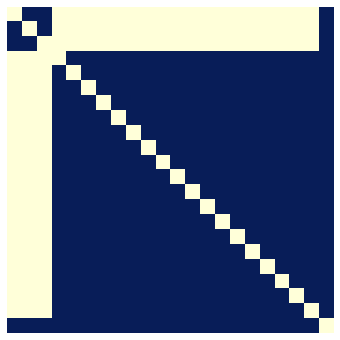

In [54]:
# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G100), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h

# there is an issue with node_grouping: https://github.com/ericmjl/nxviz/issues/536
h = nv.MatrixPlot(graph=largest_ccs, node_grouping='grouping')
#h = nv.MatrixPlot(graph=largest_ccs)

# Draw the MatrixPlot to the screen
h.draw()
plt.show();

## ArcPlot

Next up, let's use the **ArcPlot** to visualize the network. You're going to practice sorting the nodes in the graph as well.

Note: this exercise may take about 4-7 seconds to execute if done correctly.

- Make an **ArcPlot** of the GitHub collaboration network, with authors sorted by degree. To do this:
    - Iterate over all the nodes in G, including the metadata (by specifying data=True).
    - In each iteration of the loop, calculate the degree of each node n with nx.degree() and set its 'degree' attribute. nx.degree() accepts two arguments: A graph and a node.
    - Create the ArcPlot object a by specifying two parameters: the graph, which is G, and the node_order, which is 'degree', so that the nodes are sorted.
    - Draw the ArcPlot object to the screen.

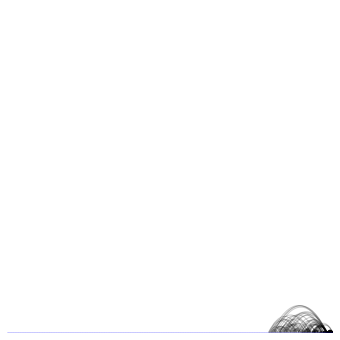

In [55]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G100.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G100.node[n]['degree'] = nx.degree(G100, n)

# Create the ArcPlot object: a
a = ArcPlot(graph=G100, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show();

## CircosPlot

Finally, you're going to make a **CircosPlot** of the network!

- Make a **CircosPlot** of the network, again, with GitHub users sorted by their degree, and grouped and coloured by their 'grouping' key. To do this:
    - Iterate over all the nodes in G, including the metadata (by specifying data=True).
    - In each iteration of the loop, calculate the degree of each node n with nx.degree() and set its 'degree' attribute.
    - Create the CircosPlot object c by specifying three parameters in addition to the graph G: the node_order, which is 'degree', the node_grouping and the node_color, which are both 'grouping'.
    - Draw the CircosPlot object to the screen.

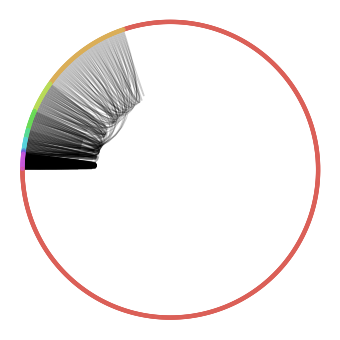

In [56]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes, including the metadata
for n, d in G100.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G100.node[n]['degree'] = nx.degree(G100, n)

# Create the CircosPlot object: c
c = CircosPlot(graph=G100, node_order='degree', node_grouping='grouping', node_color='grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show();

## Finding cliques (I)

You're now going to practice finding cliques in G. Recall that **cliques** are `"groups of nodes that are fully connected to one another"`, while a **maximal clique** is a `clique that cannot be extended by adding another node in the graph`.

- Count the number of maximal cliques present in the graph and print it.
    - Use the `nx.find_cliques()` function of G to find the maximal cliques.
    - The `nx.find_cliques()` function returns a generator object. To count the number of maximal cliques, you need to first convert it to a list with list() and then use the len() function. Place this inside a print() function to print it.

In [57]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G100)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

990


Finding cliques (II)

Let's continue by finding a particular maximal clique, and then plotting that clique.

- Find the author(s) that are part of the largest maximal clique, and plot the subgraph of that/one of those clique(s) using a **CircosPlot**. To do this:
    - Use the `nx.find_cliques()` function to calculate the maximal cliques in G. Place this within the provided `sorted()` function to calculate the largest maximal clique.
    - Create the subgraph consisting of the largest maximal clique using the `.subgraph()` method and largest_clique.
    - Create the **CircosPlot** object using the subgraph G_lc (without any other arguments) and plot it.

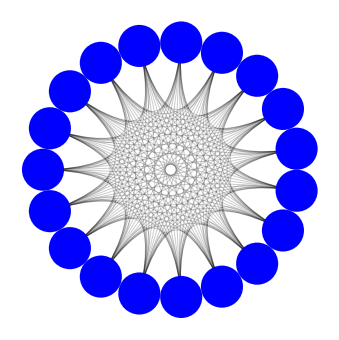

In [58]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G100), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G100.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(graph=G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show();

The subgraph consisting of the largest maximal clique has 19 users. It's time to move on towards building the recommendation system!

## 